In [17]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
path = 'C:/Users/LJ/Downloads/'

In [8]:
df = pd.read_csv(path + 'customersdata.csv')

In [9]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


FRESH: annual spending (m.u.) on fresh products (Continuous);
MILK: annual spending (m.u.) on milk products (Continuous);
GROCERY: annual spending (m.u.)on grocery products (Continuous);
FROZEN: annual spending (m.u.)on frozen products (Continuous)
DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal) REGION
Now that you know about the features about the dataset, let's display some stats of the data.

In [10]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


# Now before proceeding any further with applying DBSCAN, it is very important that you know the data well so as know what kind of data is in the dataset, what distribution the data follows, and which features are numerical or not.

# Our most of the data is continous except channel and region as seen above

#  You can see most of the data in this dataset is continuous in nature except for two features: Channel and Region. So for easing your computations, you will drop these two:

In [13]:
df.drop(["Channel", "Region"], axis = 1, inplace = True)

In [14]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


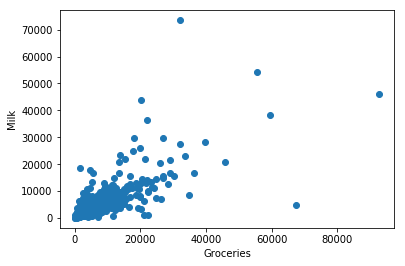

In [12]:
x = df['Grocery']
y = df['Milk']

plt.scatter(x,y)
plt.xlabel("Groceries")
plt.ylabel("Milk")
plt.show()

In [15]:
df = df[["Grocery", "Milk"]]
df = df.as_matrix().astype("float32", copy = False)

C:\Users\LJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [18]:
stscaler = StandardScaler().fit(df)
df = stscaler.transform(df)

In [19]:
dbsc = DBSCAN(eps = .5, min_samples = 15).fit(df)

In [20]:
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True